https://www.kaggle.com/kmader/nuclei-overview-to-submission/notebook

In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
images_path = glob(os.path.join('data', '*_stage1', '*', '*', '*'))

In [3]:
len(images_path)

30196

In [4]:
path_df = pd.DataFrame(index=images_path)

In [5]:
img_type = lambda path: path.split('/')[-2]
img_id = lambda path: path.split('/')[-3]
img_group = lambda path: path.split('/')[-4].split('_')[0]
img_stage =lambda path: path.split('/')[-4].split('_')[1]

In [6]:
path_df['Image_ID'] = path_df.index.map(img_id)
path_df['Image_GROUP'] = path_df.index.map(img_group)
path_df['Image_TYPE'] = path_df.index.map(img_type)
path_df['Image_STAGE'] = path_df.index.map(img_stage)

In [7]:
path_df

,Image_ID,Image_GROUP,Image_TYPE,Image_STAGE
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/235e0f8b86d5c55c4a06824609a73529f635c35662e923125afa6547bb3e94fc.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/f7bcd4e0827008b727de64a8cb8b711c05a60d70ea5ec502750889a4c16ff649.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/11ac8eace5d73fc8054822b46db13e09813527faa13ced27b34438a71ae283fe.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/284555ce90e1a496fa3614caebd5c950e8958bcb6fcba15a3c3348adf6f95a45.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/f3aa2fb4bbf59cadb44b80816e27829d53a42a3070b25344b940d74c7f904081.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/5f1bd00c720d8c1773b22b93cc00f4ed513feee75bba24a8817a2428dcfb55dd.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/b98634d74b798c2d99185e58368a82bb5fcd7baeb852087c8c453ba255e2a20d.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/22a1c122c8ea0553beabb73b921789a69118e1eec84f1c5b3b9fad552dd6017f.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/bef550f42196acf68cb0ab311dfb54f0cfc09865cef80b359d99feea18f80286.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1
data/train_stage1/a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7/masks/d84c6363677444fe89acc77faac165e5e0e9c9dd3e35b894a5db1cba8f410dbe.png,a9d884ba0929dac87c2052ce5b15034163685317d7cff4...,train,masks,stage1


In [8]:
path_df.describe()

,Image_ID,Image_GROUP,Image_TYPE,Image_STAGE
count,30196,30196,30196,30196
unique,735,2,2,1
top,a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a98...,train,masks,stage1
freq,376,30131,29461,30196


In [9]:
%%time

train_df = path_df.query('Image_GROUP=="train"')
train_rows = []
group_cols = ['Image_STAGE', 'Image_ID']

for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['masks'] = n_rows.query('Image_TYPE == "masks"').index.values.tolist()
    c_row['images'] = n_rows.query('Image_TYPE == "images"').index.values.tolist()
    train_rows += [c_row]
train_img_df = pd.DataFrame(train_rows)    

CPU times: user 2.01 s, sys: 16 ms, total: 2.03 s
Wall time: 2.01 s


In [10]:
%%time
IMG_CHANNELS = 3
def read_and_stack(in_img_list):
    return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0
train_img_df['images'] = train_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
train_img_df['masks'] = train_img_df['masks'].map(read_and_stack).map(lambda x: x.astype(int))
train_img_df.sample(1)

CPU times: user 32.9 s, sys: 25.5 s, total: 58.5 s
Wall time: 58.5 s


In [11]:
train_img_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 4 columns):
Image_ID       670 non-null object
Image_STAGE    670 non-null object
images         670 non-null object
masks          670 non-null object
dtypes: object(4)
memory usage: 791.4 MB


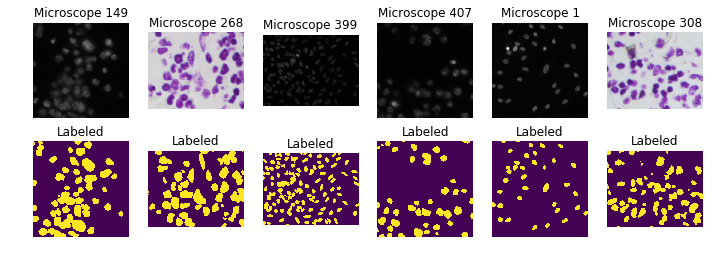

In [12]:
n_img = 6
fig, m_axs = plt.subplots(2, n_img, figsize = (12, 4))
for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), 
                                     m_axs.T):
    c_im.imshow(c_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope ' + str(_))
    
    c_lab.imshow(c_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Labeled')

In [13]:
train_img_df['images'].map(lambda x: x.shape).value_counts()

(256, 256, 3)      334
(256, 320, 3)      112
(520, 696, 3)       92
(360, 360, 3)       91
(1024, 1024, 3)     16
(512, 640, 3)       13
(603, 1272, 3)       6
(260, 347, 3)        5
(1040, 1388, 3)      1
Name: images, dtype: int64

In [14]:
train_img_df['masks'].map(lambda x: x.shape).value_counts()

(256, 256)      334
(256, 320)      112
(520, 696)       92
(360, 360)       91
(1024, 1024)     16
(512, 640)       13
(603, 1272)       6
(260, 347)        5
(1040, 1388)      1
Name: masks, dtype: int64

In [15]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, UpSampling2D, Lambda

Using TensorFlow backend.


In [16]:
import tensorflow as tf
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [134]:
simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (None, None, IMG_CHANNELS), 
                                  name = 'NormalizeInput'))

simple_cnn.add(Conv2D(16, kernel_size = (3,3), padding = 'same'))
simple_cnn.add(Conv2D(16, kernel_size = (3,3), padding = 'same'))

# use dilations to get a slightly larger field of view
simple_cnn.add(Conv2D(32, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(64, kernel_size = (3,3), dilation_rate = 2, padding = 'same'))
simple_cnn.add(Conv2D(64, kernel_size = (3,3), dilation_rate = 3, padding = 'same'))

# the final processing
simple_cnn.add(Conv2D(32, kernel_size = (1,1), padding = 'same'))
simple_cnn.add(Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid'))
simple_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, None, None, 3)     12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 16)    448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, None, None, 32)    2080      
__________

In [135]:
from keras import backend as K
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

simple_cnn.compile(optimizer = 'adam', 
                   loss = dice_coef_loss, 
                   metrics = [dice_coef, 'acc', 'mse'])

In [136]:
def simple_gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

In [137]:
simple_cnn.fit_generator(simple_gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 10)

Epoch 1/10
670/670 [==============================] - 41s - loss: -0.7410 - dice_coef: 0.7410 - acc: 0.9033 - mean_squared_error: 0.0932    
Epoch 2/10
670/670 [==============================] - 36s - loss: -0.7960 - dice_coef: 0.7960 - acc: 0.9288 - mean_squared_error: 0.0701    
Epoch 3/10
670/670 [==============================] - 38s - loss: -0.8016 - dice_coef: 0.8016 - acc: 0.9307 - mean_squared_error: 0.0687    
Epoch 4/10
670/670 [==============================] - 37s - loss: -0.8037 - dice_coef: 0.8037 - acc: 0.9310 - mean_squared_error: 0.0687    
Epoch 5/10
670/670 [==============================] - 38s - loss: -0.7979 - dice_coef: 0.7979 - acc: 0.9305 - mean_squared_error: 0.0693    
Epoch 6/10
670/670 [==============================] - 38s - loss: -0.7980 - dice_coef: 0.7980 - acc: 0.9253 - mean_squared_error: 0.0745    
Epoch 7/10
670/670 [==============================] - 38s - loss: -0.7977 - dice_coef: 0.7977 - acc: 0.9278 - mean_squared_error: 0.0721    
Epoch 8/10
67

In [21]:
%%time
test_df = path_df.query('Image_GROUP=="test"')
test_rows = []
group_cols = ['Image_STAGE', 'Image_ID']
for n_group, n_rows in test_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['images'] = n_rows.query('Image_TYPE == "images"').index.values.tolist()
    test_rows += [c_row]
test_img_df = pd.DataFrame(test_rows)    

test_img_df['images'] = test_img_df['images'].map(read_and_stack).map(lambda x: x[:,:,:IMG_CHANNELS])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)

65 images to process
CPU times: user 836 ms, sys: 68 ms, total: 904 ms
Wall time: 871 ms


In [138]:
%%time
test_img_df['masks'] = test_img_df['images'].map(lambda x: simple_cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])

CPU times: user 1.82 s, sys: 252 ms, total: 2.07 s
Wall time: 1.81 s


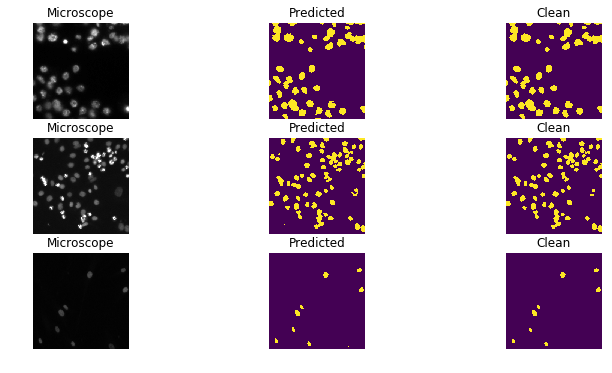

In [145]:
n_img = 3
from skimage.morphology import closing, opening, disk

def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))

fig, m_axs = plt.subplots(3, n_img, figsize = (12, 6))
for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), 
                                     m_axs):
    c_im.imshow(d_row['images'])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')
    
    c_clean.imshow(clean_img(d_row['masks']))
    c_clean.axis('off')
    c_clean.set_title('Clean')

In [30]:
train_labels = pd.read_csv('data/train_stage1_labels/stage1_train_labels.csv')
train_labels['EncodedPixels'] = train_labels['EncodedPixels'].map(lambda ep: [int(x) for x in ep.split(' ')])
train_labels.sample(3)

,ImageId,EncodedPixels
20710,ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9...,"[7665, 2, 7920, 4, 8174, 7, 8429, 9, 8684, 10,..."
3760,1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1...,"[218586, 7, 219104, 11, 219623, 13, 220140, 17..."
22332,be1916d0e5592c17f971315b5de720ef6894173087399d...,"[33478, 8, 33734, 7, 33989, 8, 34246, 8, 34502..."


In [28]:
from skimage.morphology import label # label regions
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cut_off = 0.5):
    lab_img = label(x>cut_off)
    if lab_img.max()<1:
        lab_img[0,0] = 1 # ensure at least one prediction per image
    for i in range(1, lab_img.max()+1):
        yield rle_encoding(lab_img==i)

In [29]:
_, train_rle_row = next(train_img_df.tail(5).iterrows()) 
train_row_rles = list(prob_to_rles(train_rle_row['masks']))

In [100]:
tl_rles = train_labels.query('ImageId=="{Image_ID}"'.format(**train_rle_row))['EncodedPixels']

In [113]:
match, mismatch = 0, 0
for img_rle, train_rle in zip(sorted(train_row_rles, key = lambda x: x[0]), 
                             sorted(tl_rles, key = lambda x: x[0])):
    for i_x, i_y in zip(img_rle, train_rle):
        if i_x == i_y:
            match += 1
        else:
            mismatch += 1
print('Matches: %d, Mismatches: %d, Accuracy: %2.1f%%' % (match, mismatch, 100.0*match/(match+mismatch)))

Matches: 360, Mismatches: 0, Accuracy: 100.0%


In [116]:
test_img_df['rles'] = test_img_df['masks'].map(clean_img).map(lambda x: list(prob_to_rles(x)))

In [120]:
out_pred_list = []
for _, c_row in test_img_df.iterrows():
    for c_rle in c_row['rles']:
        out_pred_list+=[dict(ImageId=c_row['Image_ID'], 
                             EncodedPixels = ' '.join(np.array(c_rle).astype(str)))]
out_pred_df = pd.DataFrame(out_pred_list)
print(out_pred_df.shape[0], 'regions found for', test_img_df.shape[0], 'images')
out_pred_df.sample(3)

1519 regions found for 65 images


,EncodedPixels,ImageId
1233,94333 1 94851 5 95371 5 95890 7 96411 5 96931 ...,d6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633f...
688,21135 6 21389 10 21644 12 21898 15 22154 16 22...,697a05c6fe4a07c601d46da80885645ad574ea19b47ee7...
454,34811 4 35065 8 35320 9 35576 9 35831 10 36087...,4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a...


In [121]:
out_pred_df.head(1)

,EncodedPixels,ImageId
0,45361 5 45615 9 45871 9 46126 11 46382 10 4663...,0114f484a16c152baa2d82fdd43740880a762c93f436c8...


In [122]:
out_pred_df[['ImageId', 'EncodedPixels']].head(1)

,ImageId,EncodedPixels
0,0114f484a16c152baa2d82fdd43740880a762c93f436c8...,45361 5 45615 9 45871 9 46126 11 46382 10 4663...


In [123]:
out_pred_df[['ImageId', 'EncodedPixels']].to_csv('predictions.csv', index = False)